#<font size="+3" color=red ><b> <center><u>Employee Perfromance data</u></center></b></font><br><a id="top"></a>

In [18]:
#!jupyter contrib nbextension install --user
!jupyter nbextension enable toc2/main



Enabling notebook extension toc2/main...
      - Validating: ok


## About the data

The Employee Performance dataset offers insights into employee demographics, training, and performance metrics


## Business Obejctive

The objective of this analysis is to identify the factors that influence employee performance and to uncover interesting key findings related to employee demographics and job switching behavior.

##  Data Pre-Processing

###  Loading the library

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_ind, f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import pandas as pd 

data = pd.read_csv('employees_final_dataset - Assessment.csv')

data.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [10]:
data.shape

(17417, 13)

### Handling missing values

In [11]:
# Checking for missing values in the dataset
missing_values=data.isnull().sum()
missing_values

employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

In [12]:
#missing_values = data.isnull().sum()
#print("Missing Values:\n", missing_values)
#blank values in %
m1 = missing_values/len(data)*100
## Missing values with %
m2 = pd.concat([missing_values,m1],axis=1,keys=['Missing','Mssing%'])
m2

,Missing,Mssing%
employee_id,0,0.000000
department,0,0.000000
region,0,0.000000
education,771,4.426710
gender,0,0.000000
recruitment_channel,0,0.000000
no_of_trainings,0,0.000000
age,0,0.000000
previous_year_rating,1363,7.825688
length_of_service,0,0.000000


<Axes: >

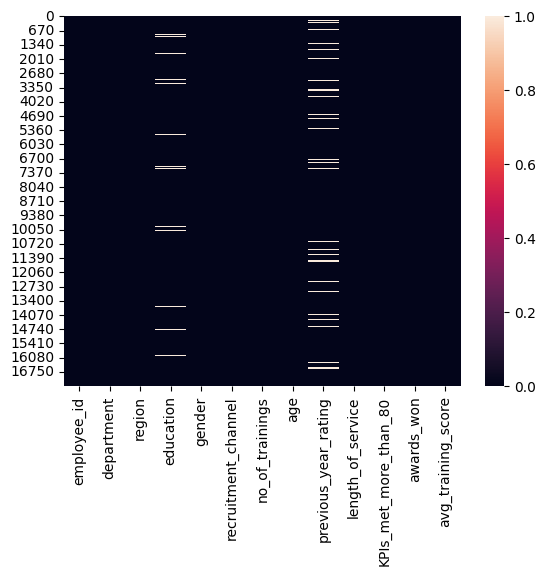

In [13]:
sns.heatmap(data.isnull())

### Imputing the missing values

In [14]:
# Filling missing values in the 'education' column with the mode (most common value)
data['education'].fillna(data['education'].mode()[0], inplace=True)

# Filling missing values in the 'previous_year_rating' column with the median
data['previous_year_rating'].fillna(data['previous_year_rating'].median(), inplace=True)

# Checking if all missing values have been filled
data.isnull().sum()


employee_id              0
department               0
region                   0
education                0
gender                   0
recruitment_channel      0
no_of_trainings          0
age                      0
previous_year_rating     0
length_of_service        0
KPIs_met_more_than_80    0
awards_won               0
avg_training_score       0
dtype: int64

## Explorative Analysis

In [7]:
# The dataset contains 13 columns and 17417 observations
data.shape

(17417, 13)

In [8]:
# Check the type of our features. 
data.dtypes

employee_id                int64
department                object
region                    object
education                 object
gender                    object
recruitment_channel       object
no_of_trainings            int64
age                        int64
previous_year_rating     float64
length_of_service          int64
KPIs_met_more_than_80      int64
awards_won                 int64
avg_training_score         int64
dtype: object

In [9]:
# Display the statistical overview of the employees
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
count,17417.000000,17417.000000,17417.000000,17417.000000,17417.000000,17417.000000,17417.000000,17417.000000
mean,39083.491129,1.250732,34.807774,3.318425,5.801860,0.358845,0.023368,63.176322
std,22707.024087,0.595692,7.694046,1.218400,4.175533,0.479675,0.151074,13.418179
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19281.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,39122.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58838.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,75.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


##  Data Visualization


### Numnerical Variables

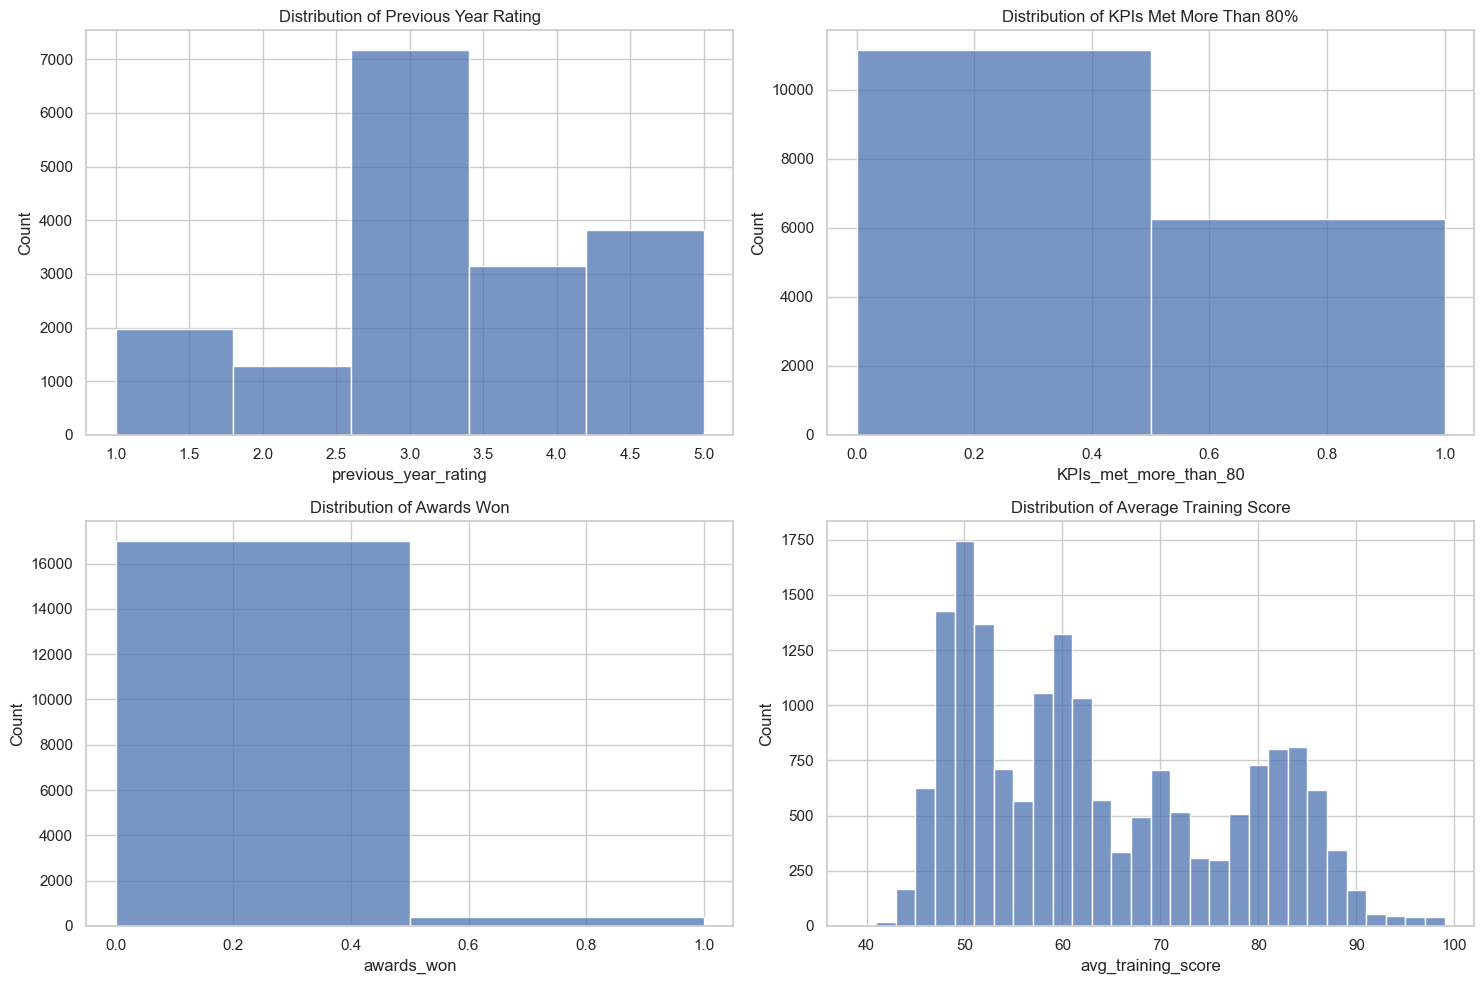

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set(style="whitegrid")

# Creating a figure for the plots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Plotting the distributions of the performance indicators
sns.histplot(data['previous_year_rating'], ax=ax[0, 0], kde=False, bins=5)
ax[0, 0].set_title('Distribution of Previous Year Rating')

sns.histplot(data['KPIs_met_more_than_80'], ax=ax[0, 1], kde=False, bins=2)
ax[0, 1].set_title('Distribution of KPIs Met More Than 80%')

sns.histplot(data['awards_won'], ax=ax[1, 0], kde=False, bins=2)
ax[1, 0].set_title('Distribution of Awards Won')

sns.histplot(data['avg_training_score'], ax=ax[1, 1], kde=False, bins=30)
ax[1, 1].set_title('Distribution of Average Training Score')

# Adjusting the layout
plt.tight_layout()
plt.show()


### Categorical Variable

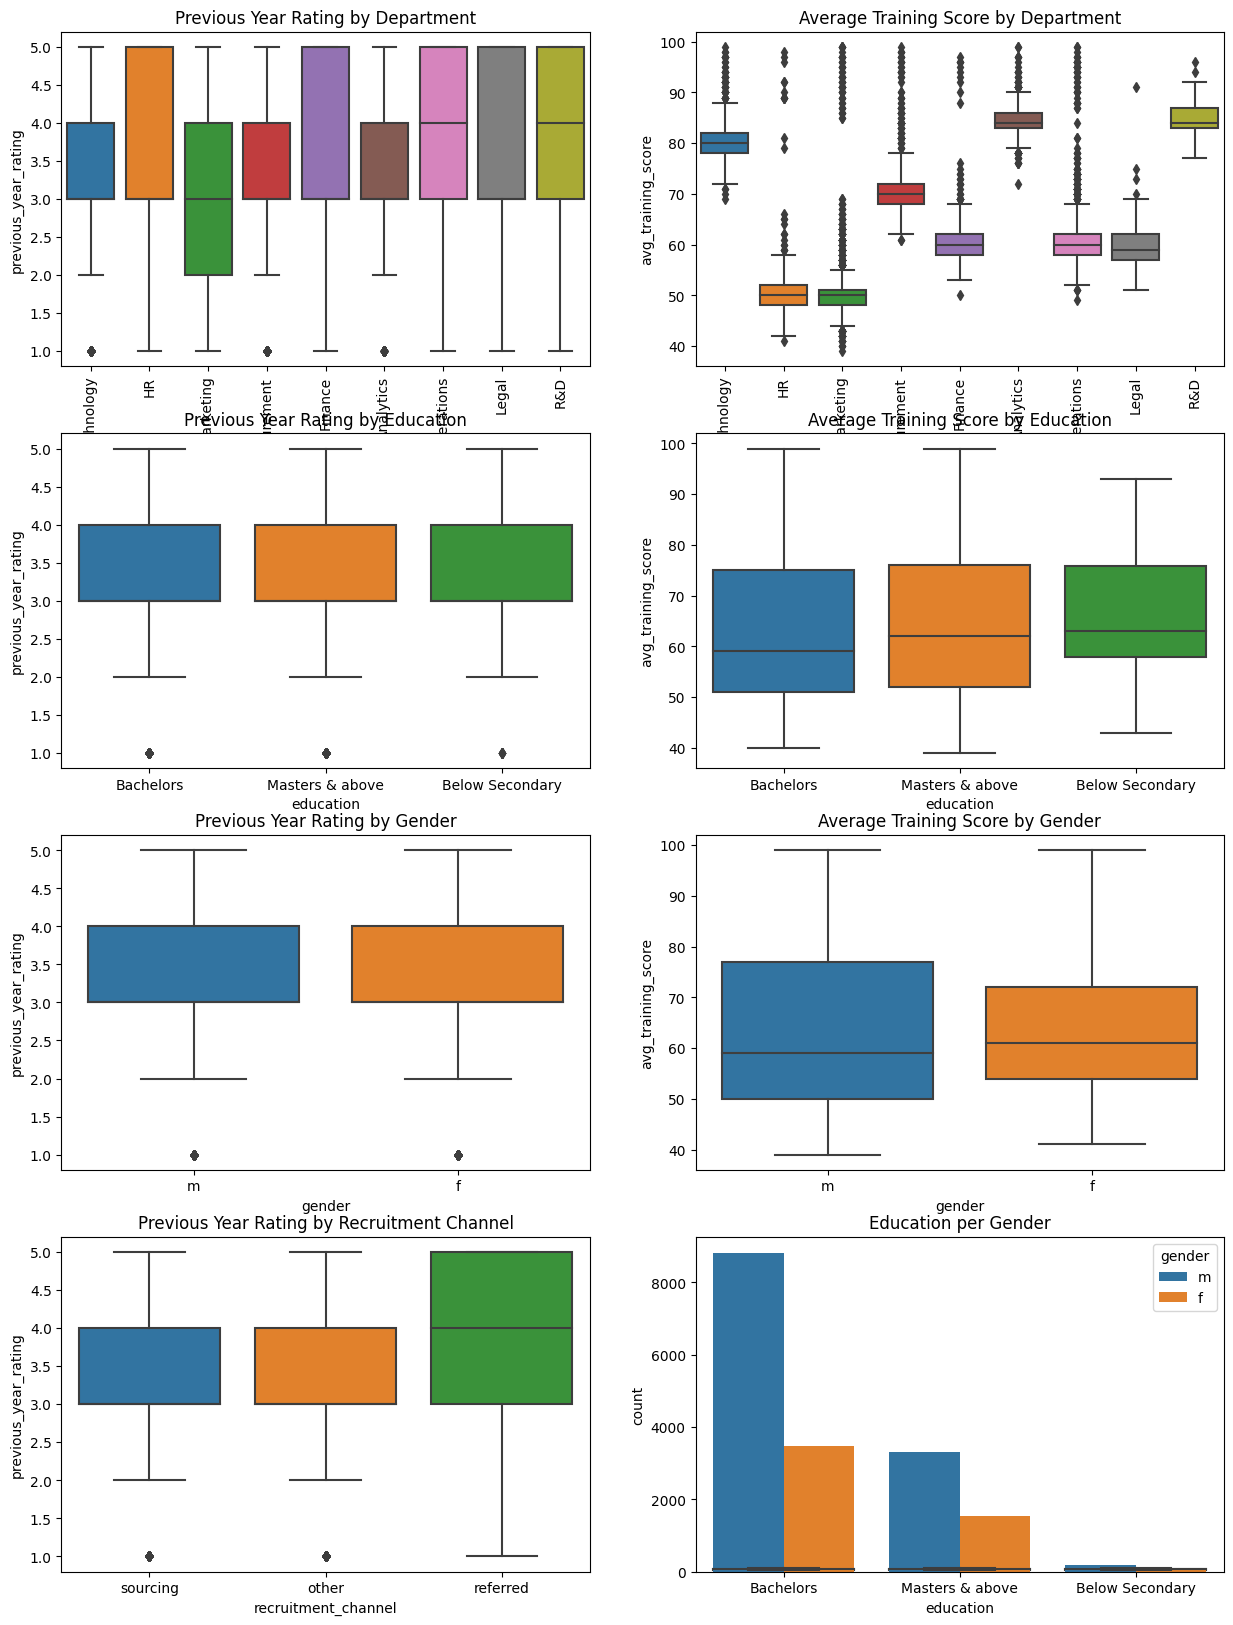

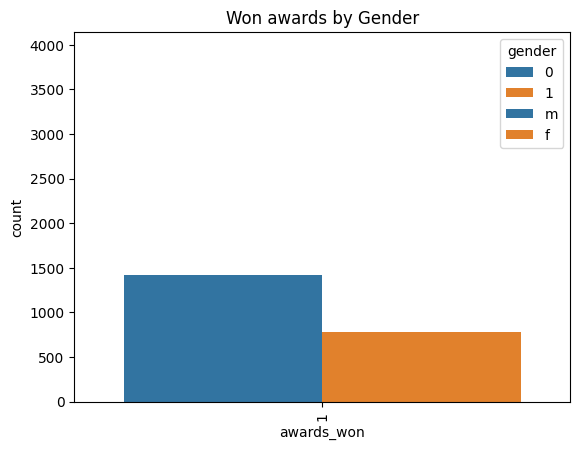

<Figure size 640x480 with 0 Axes>

In [10]:
# Creating a figure for the plots
fig, ax = plt.subplots(4, 2, figsize=(15, 20))

# Plotting the relationships between the performance indicators and the 'department' feature
sns.boxplot(x='department', y='previous_year_rating', data=data, ax=ax[0, 0])
ax[0, 0].set_title('Previous Year Rating by Department')
ax[0, 0].tick_params(axis='x', rotation=90)

sns.boxplot(x='department', y='avg_training_score', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Average Training Score by Department')
ax[0, 1].tick_params(axis='x', rotation=90)

# Plotting the relationships between the performance indicators and the 'education' feature
sns.boxplot(x='education', y='previous_year_rating', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Previous Year Rating by Education')

sns.boxplot(x='education', y='avg_training_score', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Average Training Score by Education')

# Plotting the relationships between the performance indicators and the 'gender' feature
sns.boxplot(x='gender', y='previous_year_rating', data=data, ax=ax[2, 0])
ax[2, 0].set_title('Previous Year Rating by Gender')

sns.boxplot(x='gender', y='avg_training_score', data=data, ax=ax[2, 1])
ax[2, 1].set_title('Average Training Score by Gender')

# Plotting the relationships between the performance indicators and the 'recruitment_channel' feature
sns.boxplot(x='recruitment_channel', y='previous_year_rating', data=data, ax=ax[3, 0])
ax[3, 0].set_title('Previous Year Rating by Recruitment Channel')

sns.boxplot(x='recruitment_channel', y='avg_training_score', data=data, ax=ax[3, 1])
ax[3, 1].set_title('Average Training Score by Recruitment Channel')

sns.countplot(data=data, x = data['education'], hue = data['gender'])
plt.title('Education per Gender')
plt.show()

sns.countplot(data=data, x="department", hue="KPIs_met_more_than_80")
plt.xticks(rotation=90)
plt.title('KPI rating per Department')

# Group the data by 'awards_won'
grouped = data.groupby('awards_won')

# Get the rows where awards were won in 'awards_won'
award_won_data = grouped.get_group(1)
sns.countplot(data = award_won_data, x='awards_won', hue = 'gender')
plt.title('Won awards by Gender')
plt.show()



# Adjusting the layout
plt.tight_layout()
plt.show()


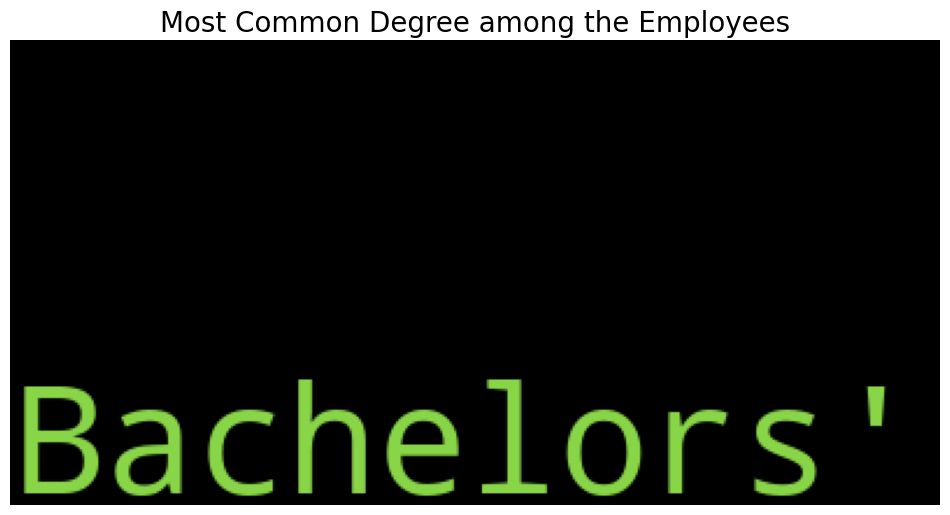

In [27]:
#Most Common degress
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

text = data['education'].values
wordcloud = WordCloud(stopwords=STOPWORDS).generate(str(text))

plt.rcParams['figure.figsize'] = (12, 8)
plt.imshow(wordcloud)
plt.title('Most Common Degree among the Employees', fontsize=20)
plt.axis('off')
plt.show()

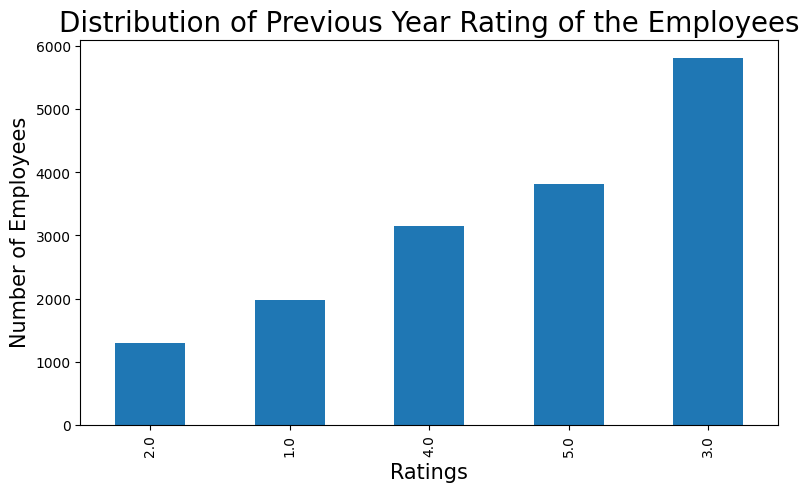

In [17]:
data['previous_year_rating'].value_counts().sort_values().plot.bar(figsize=(9, 5))
plt.title('Distribution of Previous Year Rating of the Employees', fontsize=20)
plt.xlabel('Ratings', fontsize=15)
plt.ylabel('Number of Employees', fontsize=15)
plt.show()

### Realtionship Between Variables

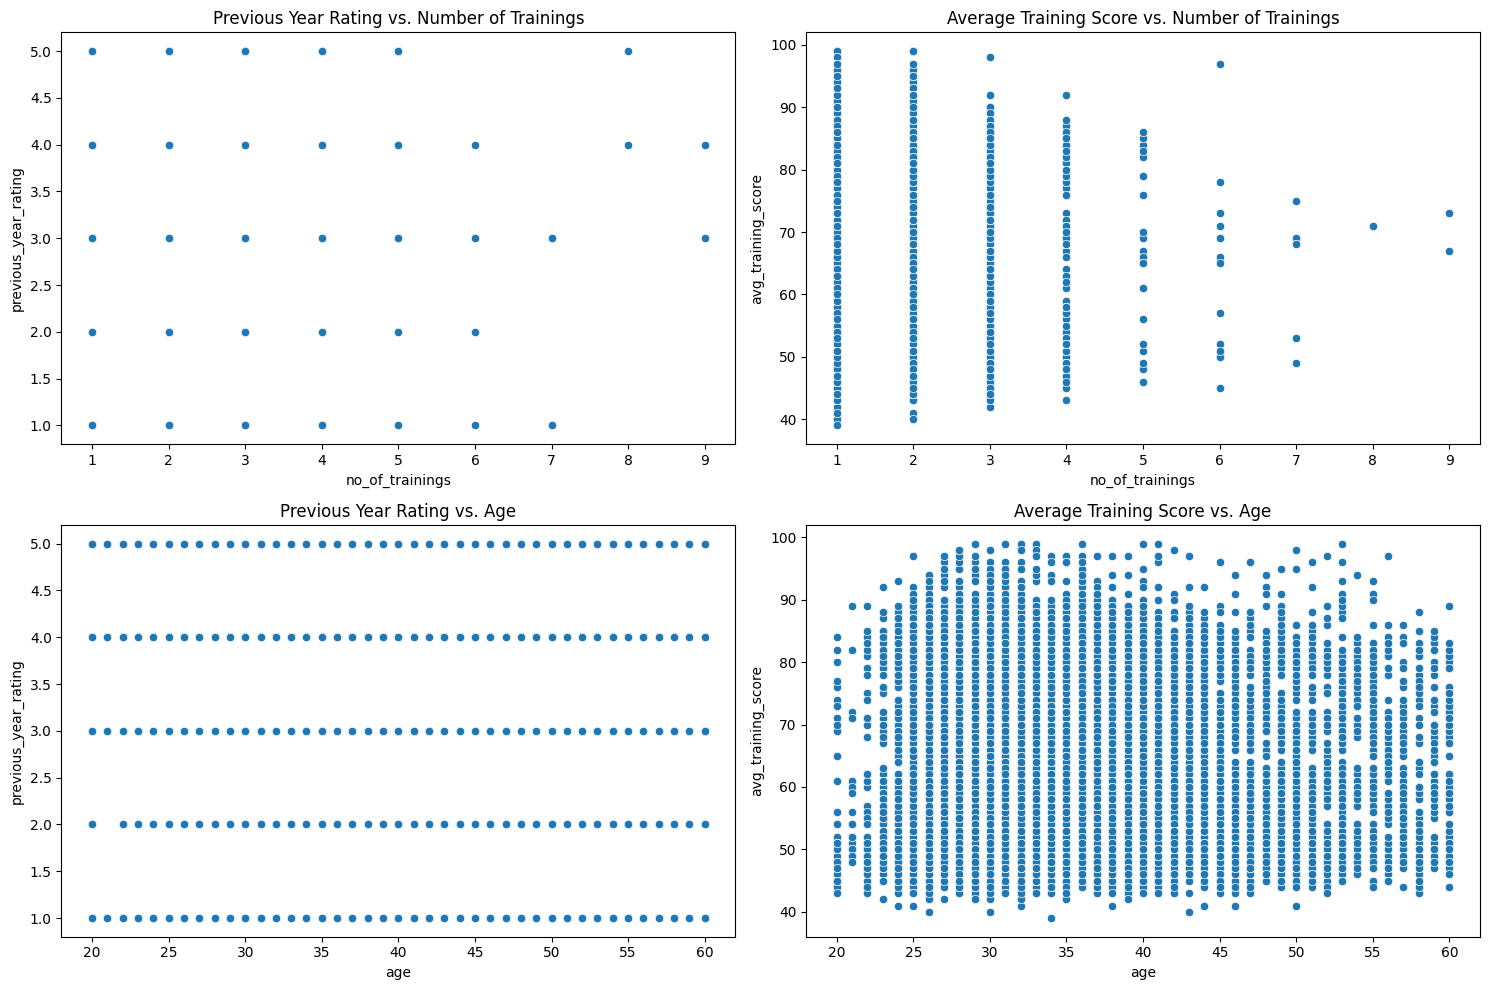

In [11]:
# Creating a figure for the plots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Plotting the relationships between the performance indicators and the 'no_of_trainings' feature
sns.scatterplot(x='no_of_trainings', y='previous_year_rating', data=data, ax=ax[0, 0])
ax[0, 0].set_title('Previous Year Rating vs. Number of Trainings')

sns.scatterplot(x='no_of_trainings', y='avg_training_score', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Average Training Score vs. Number of Trainings')

# Plotting the relationships between the performance indicators and the 'age' feature
sns.scatterplot(x='age', y='previous_year_rating', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Previous Year Rating vs. Age')

sns.scatterplot(x='age', y='avg_training_score', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Average Training Score vs. Age')

# Adjusting the layout
plt.tight_layout()
plt.show()

## Which department has achived the KPI more than 80 ?

Text(0.5, 1.0, 'KPI rating per Department')

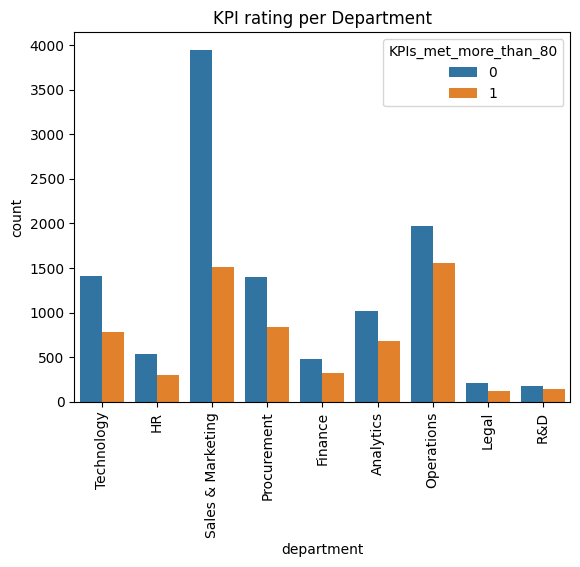

In [10]:
#KPI rating per dept
sns.countplot(data=data, x="department", hue="KPIs_met_more_than_80")
plt.xticks(rotation=90)
plt.title('KPI rating per Department')

In this graph we can see that, sales and marketing deat shwoing highest achived KPIs

## Which department has highest tranning score?

Text(0.5, 1.0, 'Avg training score per Department')

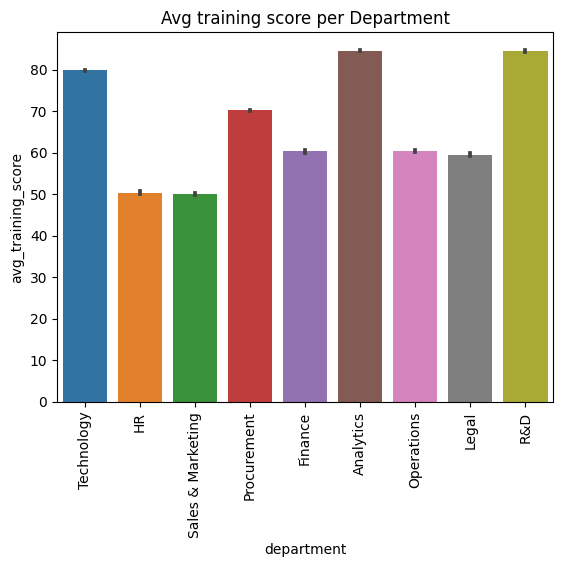

In [11]:
## Average Tranning score per department
sns.barplot(data=data, x = 'department', y = 'avg_training_score')
plt.xticks(rotation=90)
plt.title('Avg training score per Department')

## KPI achived and Performance

<Figure size 1000x600 with 0 Axes>

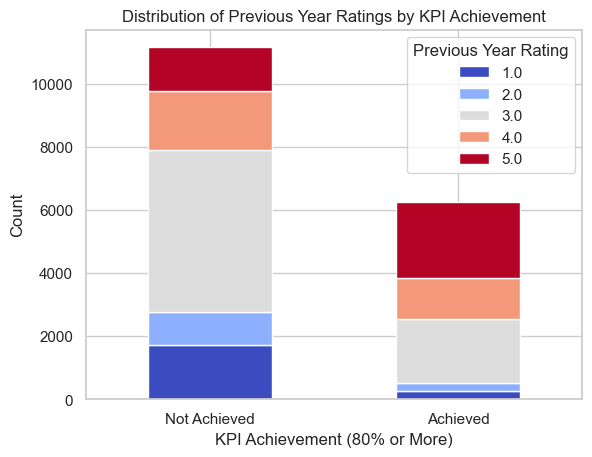

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


# Group data by KPI achievement and calculate the count of each rating
rating_counts = data.groupby(['KPIs_met_more_than_80', 'previous_year_rating']).size().unstack().fillna(0)

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.xlabel('KPI Achievement (80% or More)')
plt.ylabel('Count')
plt.title('Distribution of Previous Year Ratings by KPI Achievement')
plt.legend(title='Previous Year Rating')
plt.xticks([0, 1], ['Not Achieved', 'Achieved'], rotation=0)
plt.show()



Employees who achieve a higher percentage of Key Performance Indicators (KPIs) above 80% are more likely to receive better ratings in the previous year.

## Age and length of services

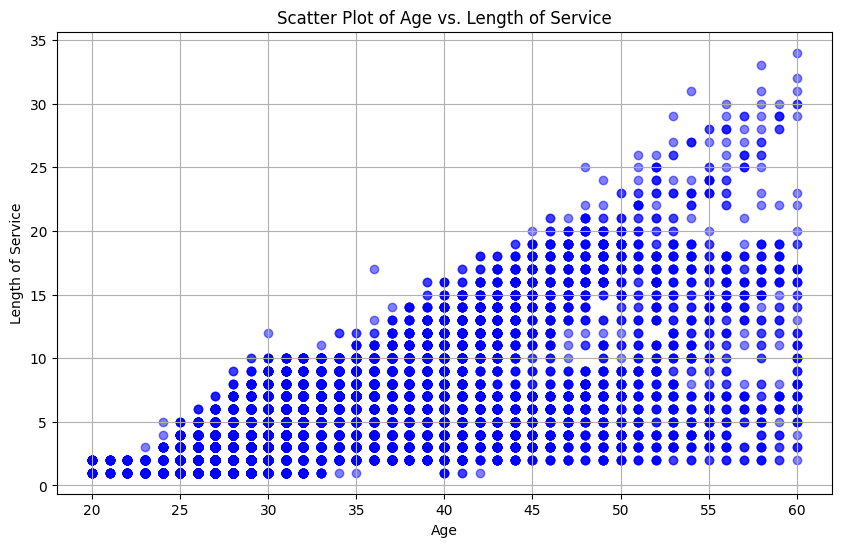

In [12]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['length_of_service'], alpha=0.5, color='blue')
plt.xlabel('Age')
plt.ylabel('Length of Service')
plt.title('Scatter Plot of Age vs. Length of Service')
plt.grid(True)

plt.show()


This suggests that as employees get older and accumulate more years of service with the company, their performance tends to improve or remain consistent.

## KPI achived and awards won

<Figure size 1000x600 with 0 Axes>

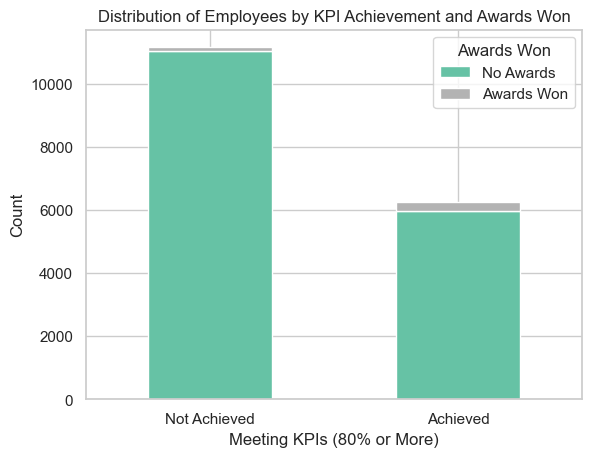

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


category_counts = data.groupby(['KPIs_met_more_than_80', 'awards_won']).size().unstack().fillna(0)


plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', stacked=True, colormap='Set2')
plt.xlabel('Meeting KPIs (80% or More)')
plt.ylabel('Count')
plt.title('Distribution of Employees by KPI Achievement and Awards Won')
plt.legend(title='Awards Won', labels=['No Awards', 'Awards Won'])
plt.xticks([0, 1], ['Not Achieved', 'Achieved'], rotation=0)
plt.show()


Employee who has achieved the KPI still won award who has not achieved.

## Recurtiment channel effectiveness

C:\Users\Tanu\AppData\Local\Temp\ipykernel_14076\3704958398.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=average_ratings, x='recruitment_channel', y='previous_year_rating', ci=None)


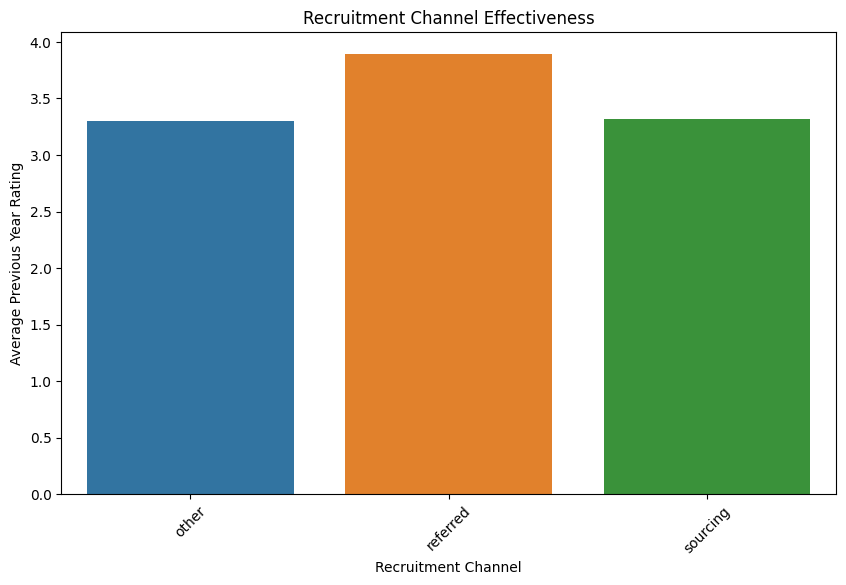

In [19]:
average_ratings = data.groupby('recruitment_channel')['previous_year_rating'].mean().reset_index()

# Create a bar chart to visualize recruitment channel effectiveness
plt.figure(figsize=(10, 6))
sns.barplot(data=average_ratings, x='recruitment_channel', y='previous_year_rating', ci=None)
plt.title('Recruitment Channel Effectiveness')
plt.xlabel('Recruitment Channel')
plt.ylabel('Average Previous Year Rating')
plt.xticks(rotation=45)
plt.show()

##  Edcuation level vs performance

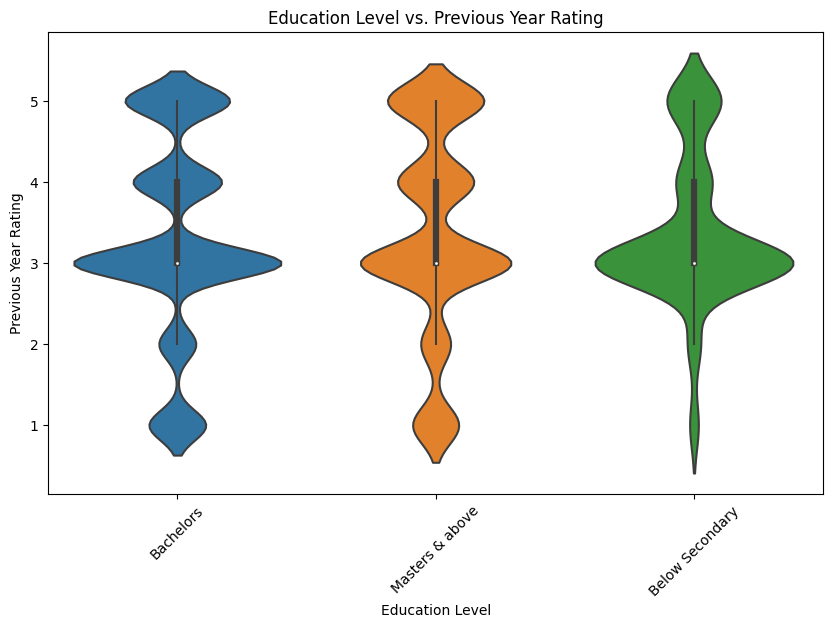

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='education', y='previous_year_rating')
plt.title('Education Level vs. Previous Year Rating')
plt.xlabel('Education Level')
plt.ylabel('Previous Year Rating')
plt.xticks(rotation=45)
plt.show()

##  Which age group are most likely to switch jobs more frequently?

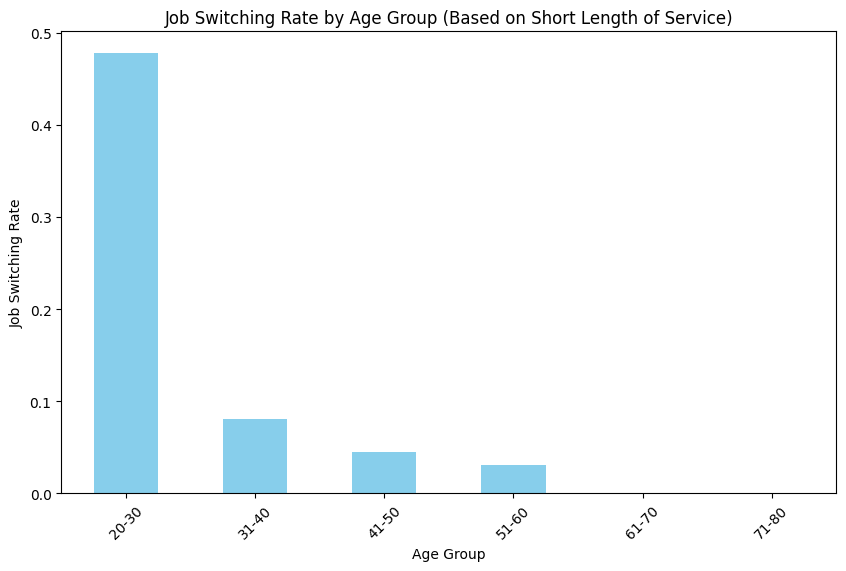

In [5]:
import pandas as pd
import matplotlib.pyplot as plt



# Create age groups
data['age_group'] = pd.cut(data['age'], bins=[20, 30, 40, 50, 60, 70, 80],
            labels=['20-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

# Define a threshold for short lengths of service (you can adjust this threshold)
short_service_threshold = 2

# Calculate job switching rates by age group
job_switching_rates = data[data['length_of_service']
<= short_service_threshold].groupby('age_group').size() / data.groupby('age_group').size()

# Visualize the job switching rates
plt.figure(figsize=(10, 6))
job_switching_rates.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Job Switching Rate')
plt.title('Job Switching Rate by Age Group (Based on Short Length of Service)')
plt.xticks(rotation=45)
plt.show()


In [26]:


# Create age groups
data['age_group'] = pd.cut(data['age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

# Define a threshold for short lengths of service (you can adjust this threshold)
short_service_threshold = 2

# Create a binary column to indicate job switching (1 for short service, 0 for others)
data['job_switched'] = (data['length_of_service'] <= short_service_threshold).astype(int)

# Create a pivot table to show job switching rates by age group
pivot_table = pd.pivot_table(data, values='job_switched', index='age_group', aggfunc='mean')

# Rename the columns
pivot_table.columns = ['Job Switching Rate']

# Reset the index
pivot_table.reset_index(inplace=True)

# Display the pivot table
print(pivot_table)


  age_group  Job Switching Rate
0     20-30            0.477550
1     31-40            0.081094
2     41-50            0.044462
3     51-60            0.031183


It appears that the "20-30" age group has the highest job switching rate, while the "51-60" age group has the lowest rate when considering short length of service as a factor.



## Which depatment of employee swtiching jobs more often?

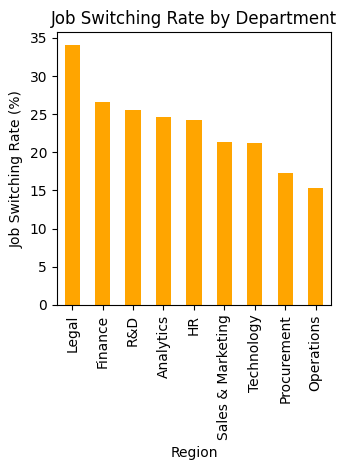

In [6]:
department_switching_rates = (data[data['length_of_service'] <= short_service_threshold]
             .groupby('department')['length_of_service']
    .count() / data.groupby('department')['length_of_service'].count()) * 100
department_switching_rates = department_switching_rates.sort_values(ascending=False)


plt.subplot(1, 2, 2)
department_switching_rates.plot(kind='bar', color='orange')
plt.xlabel('Region')
plt.ylabel('Job Switching Rate (%)')
plt.title('Job Switching Rate by Department')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()


People are switching the job in legal department, operation depatment is the lowest where people are swtiching their jobs


## Which factors have the highest impact on employee performance?


## Correaltion Study

To start with our aim to know which factors has high impact on perfromace, Lets see the realtsionship between them.

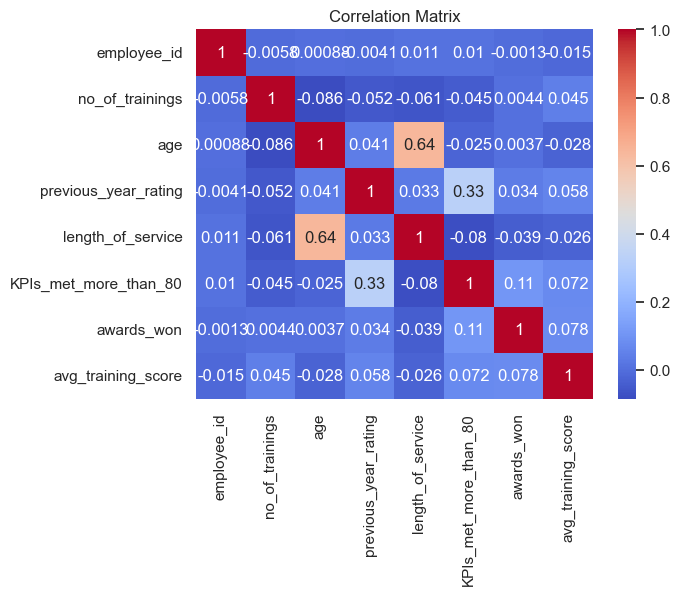

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Heatmap: Correlation Matrix
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [21]:
# Extract correlations with the 'previous_year_rating' column
correlation_with_target = correlation_matrix['previous_year_rating'].abs()

# Sort features by correlation (in descending order)
correlation_sorted = correlation_with_target.sort_values(ascending=False)

# Select top N features (adjust N based on your preference)
top_features = correlation_sorted[1:]  # Exclude 'previous_year_rating' itself

# Print the top features and their correlation values
print(top_features)


KPIs_met_more_than_80    0.329796
avg_training_score       0.057996
no_of_trainings          0.051862
age                      0.041007
awards_won               0.034439
length_of_service        0.032876
employee_id              0.004106
Name: previous_year_rating, dtype: float64


###  Insights

#### Positive Relation

* 'age'(0.04): This indicates that older employees tend to have slightly higher previous year ratings. The correlation is relatively weak, but it suggests a positive association.

* 'length_of_service (Correlation': 0.032876):this suggests that employees with longer service durations tend to have slightly higher previous year ratings.

* 'avg_training_score'(0.05): Employees with higher average training scores tend to have slightly higher previous year ratings. This correlation, while positive, is not very strong.

* 'KPIs_met_more_than_80'(Correlation: 0.329796): This is a relatively stronger correlation, indicating that employees who have met more Key Performance Indicators (KPIs) tend to have higher previous year ratings.

* 'awards_won' (Correlation: 0.034439):Employees who have won awards have a minor positive association with higher previous year ratings, but the correlation is relatively weak.

####  Negitive Relation
'no_of_trainings'(-0.05): This suggests that employees who have attended more training programs tend to have slightly lower previous year ratings. However, the correlation is not very strong, so it's not a major predictor of performance.

## Linear Regression Model

### Hypothesis Testing

Null Hypothesis (H0): None of the predictor variables have statistically significant relationships with the target variable 'previous_year_rating'.
    
Alternate Hypothesis (H1): At least one of the predictor variables has a statistically significant relationship with the target variable 'previous_year_rating.

### Defining the target and features variables

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Selecting the features and the target variable
features = data.drop(['employee_id', 'previous_year_rating'], axis=1)
target = data['previous_year_rating']

 ### One Hot encoding for categorical variables

In [23]:

# Identifying the categorical features
categorical_features = features.select_dtypes(include=['object']).columns

# Performing one-hot encoding
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = pd.DataFrame(encoder.fit_transform(features[categorical_features]))

# Replacing the categorical features with the encoded features
features = features.drop(categorical_features, axis=1)
features = pd.concat([features, encoded_features], axis=1)

# Splitting the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


C:\Users\Tanu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((13933, 52), (3484, 52))

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Creating a linear regression model
model = LinearRegression()




### Result of regression

In [25]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np

# Converting all feature names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Creating the OLS model and fitting it
model = sm.OLS(y_train, X_train).fit()

# Print the summary statistics of the regression model
print(model.summary())

# Making predictions on the test set
predictions = model.predict(X_test)

# Calculating the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", rmse)


                                  OLS Regression Results                                 
Dep. Variable:     previous_year_rating   R-squared (uncentered):                   0.899
Model:                              OLS   Adj. R-squared (uncentered):              0.898
Method:                   Least Squares   F-statistic:                              2371.
Date:                  Thu, 28 Sep 2023   Prob (F-statistic):                        0.00
Time:                          18:23:47   Log-Likelihood:                         -21440.
No. Observations:                 13933   AIC:                                  4.298e+04
Df Residuals:                     13881   BIC:                                  4.338e+04
Df Model:                            52                                                  
Covariance Type:              nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
----------

Looking at the provided results:

* The coefficient of 'KPIs_met_more_than_80' is 0.7933 with a very low p-value (Prob (F-statistic): 0.00). This suggests that 'KPIs_met_more_than_80' is statistically significant and positively associated with 'previous_year_rating.' Therefore, we can **reject the null hypothesis** for this variable.

* The coefficient of 'avg_training_score' is 0.0310 with a very low p-value (Prob (F-statistic): 0.00). This suggests that 'avg_training_score' is statistically significant and positively associated with 'previous_year_rating.' Therefore, we also **reject the null hypothesis** for this variable.


* As a result, we have statistical evidence to support the alternate hypothesis for 'KPIs_met_more_than_80' and 'avg_training_score,' indicating that **these variables are statistically significant in explaining variations in 'previous_year_rating.'**,

<span style="color: blue;">The variables 'KPIs_met_more_than_80' and 'avg_training_score,' are the factor have the highest impact on employee performance</span>

**Insights**

- The R-squared value (R-squared (uncentered): 0.899) suggests that the model explains approximately 89.9% of the variance in 'previous_year_rating,' indicating a good fit of the model to the data.

- 'KPIs_met_more_than_80' has a positive coefficient of 0.7933, indicating that as employees meet more than 80% of their Key Performance Indicators (KPIs), their previous year ratings tend to be higher.

- 'avg_training_score' also has a positive coefficient of 0.0310, indicating that as the average training score of employees increases, their previous year ratings tend to be higher.

- Other predictor variables such as 'age,' 'length_of_service,' 'awards_won,' and 'no_of_trainings' may not be statistically significant in explaining variations in 'previous_year_rating' based on their coefficients and p-values

## Logistic Regression Model

**Does meeting 80% or more of their Key Performance Indicators (KPIs) significantly influence an employee's overall performance rating?**

## Hypothesis Testing 


Null Hypothesis (H0):
The meeting of 80% or more of KPIs has no significant influence on an employee's overall performance rating.

Alternative Hypothesis (H1):
The meeting of 80% or more of KPIs has a significant influence on an employee's overall performance rating.

In [51]:
#Spliting Data

from sklearn.preprocessing import StandardScaler

# Redefining the target variable
target = data['KPIs_met_more_than_80']

# Splitting the data into a new training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [52]:
# Convert feature names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:



# Creating a logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the scaled training data
result =model.fit(X_train_scaled, y_train)

# Now you can use X_test_scaled for prediction
y_pred = model.predict(X_test_scaled)


## Model Evaulation

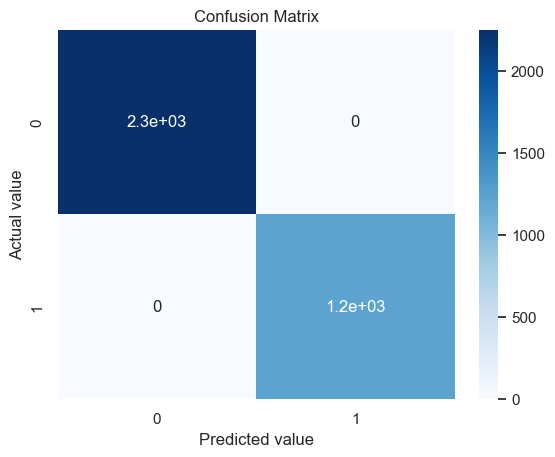

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# calculate accuracy, precision, recall and f1_score
accuracy_lg = accuracy_score(y_test, y_pred)*100
precision_lg = precision_score(y_test, y_pred)*100
score_lg = f1_score(y_test, y_pred)*100
recall_lg = recall_score(y_test, y_pred)*100


# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues")

# Set labels and title
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

In [73]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2253
           1       1.00      1.00      1.00      1231

    accuracy                           1.00      3484
   macro avg       1.00      1.00      1.00      3484
weighted avg       1.00      1.00      1.00      3484

Confusion Matrix:
[[2253    0]
 [   0 1231]]


The model is performing exceptionally well with an accuracy of 100%. Meaning that we can reject the null hypothesis, the model is correctly identifying all instances of both classes (meeting and not meeting 80% of KPIs) without any false positives or false negatives. This is a strong indication of a well-performing model.

In [33]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Creating a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)

# Conducting the grid search
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

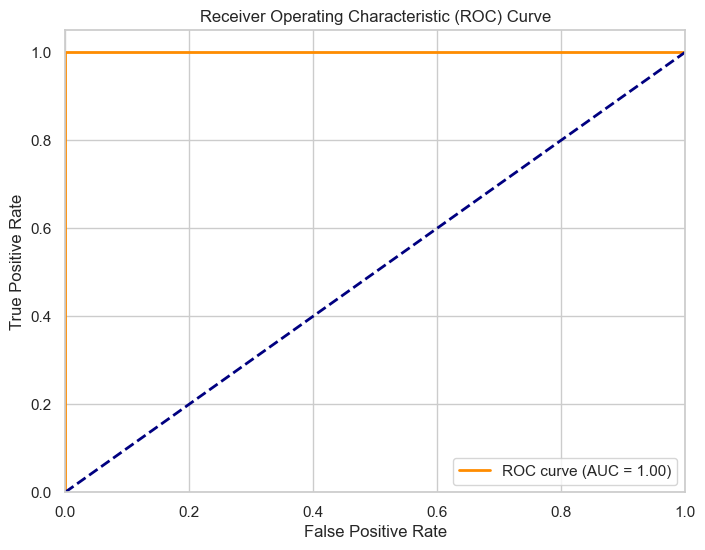

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have your logistic regression model (model) and data (X_test_scaled, y_test)
y_scores = model.predict_proba(X_test_scaled)[:, 1]  # Get the probability estimates of the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



##  Take home message

**Overall Insights**

* Age and Experience: Older employees with more years of service tend to have higher performance ratings. Experience is valuable in enhancing performance.

* KPIs Met: Meeting Key Performance Indicators (KPIs) has a significant positive impact on performance ratings. Employees who consistently meet their KPIs tend to receive higher ratings.

* Training: Investment in employee training positively correlates with performance. Employees who have received more training tend to perform better. 

* Job Switching: We observed a job switching rate among employees, with younger age groups exhibiting higher job switching tendencies.

* Job switching department: Legel department where people are switching their job often.